In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append("../radarchart/")
from radarchart import Radar

In [2]:
pd.options.display.float_format = '{:.4f}'.format

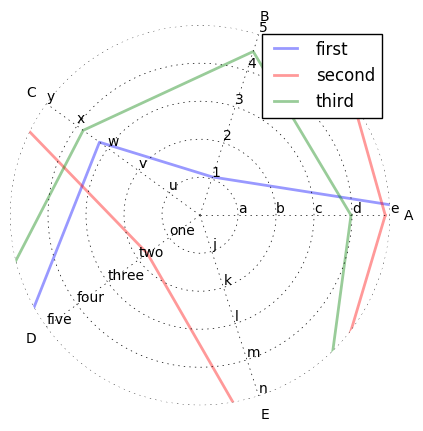

In [3]:
def random_series(n):
    return [np.random.rand()+np.random.randint(low=1, high=10) for _ in range(n)]

def calc_limits_and_scale(values):
    ymin, ymax = (min(values), max(values))
    limits = ymin, ymax
    mean = np.mean(values)
    return limits, mean

a = random_series(5)
b = random_series(5)
c = random_series(5)

fig = plt.figure(figsize=(4, 4))

titles = list("ABCDE")

labels = [
    list("abcde"), list("12345"), list("uvwxy"), 
    ["one", "two", "three", "four", "five"],
    list("jklmn")
]

radar = Radar(fig, titles, labels)
radar.plot(a,  "-", lw=2, color="b", alpha=0.4, label="first")
radar.plot(b,"-", lw=2, color="r", alpha=0.4, label="second")
radar.plot(c, "-", lw=2, color="g", alpha=0.4, label="third")
radar.ax.legend()
plt.show()

### no scaling or normalization

### normalization

In [4]:
from sklearn import preprocessing

In [5]:
def normalize(values):
    values = np.array(values)
    if len(values.shape)==1:
        values = values.reshape(1,-1)
    values = preprocessing.normalize(values)
    values = values + 1
    return values.flatten().tolist()

[1.547582897949314, 1.0858186177377118, 1.2651141576469092, 1.479638100028519, 1.626458227768797]
[1.3011245696064562, 1.5217290164418618, 1.6055231676100468, 1.105793914805782, 1.5091877532497184]
[1.2785061222141245, 1.317529837520998, 1.2663226189008232, 1.5863619096953725, 1.6378566576381735]



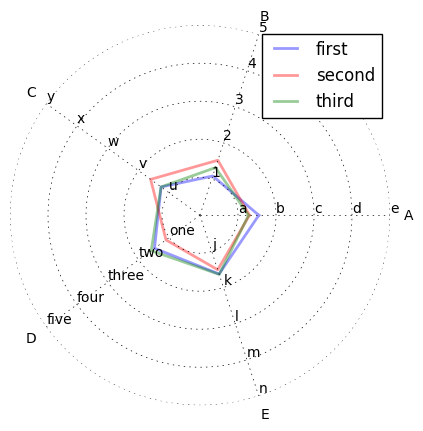

In [6]:
a_norm = normalize(a)
b_norm = normalize(b)
c_norm = normalize(c)

print a_norm
print b_norm
print c_norm
print

fig = plt.figure(figsize=(4, 4))

titles = list("ABCDE")

labels = [
    list("abcde"), list("12345"), list("uvwxy"), 
    ["one", "two", "three", "four", "five"],
    list("jklmn")
]

radar = Radar(fig, titles, labels)
radar.plot(a_norm,  "-", lw=2, color="b", alpha=0.4, label="first")
radar.plot(b_norm,"-", lw=2, color="r", alpha=0.4, label="second")
radar.plot(c_norm, "-", lw=2, color="g", alpha=0.4, label="third")
radar.ax.legend()
plt.show()

### scaling

In [7]:
def make_labels(values, n):
    scale_range = np.linspace(min(values), max(values), n)
    labels = [['{:.2f}'.format(value) for value in sublist] 
                  for sublist in [scale_range for _ in range(len(scale_range))]]
    return labels

[4.416429515292468, 1.0, 2.3265438682814126, 3.913730144694089, 5.0]
[2.563491860478952, 4.329283601486459, 5.0, 1.0, 4.228899138325518]
[1.1311697130600091, 1.5513058108398496, 1.0, 4.445598598526211, 5.0]



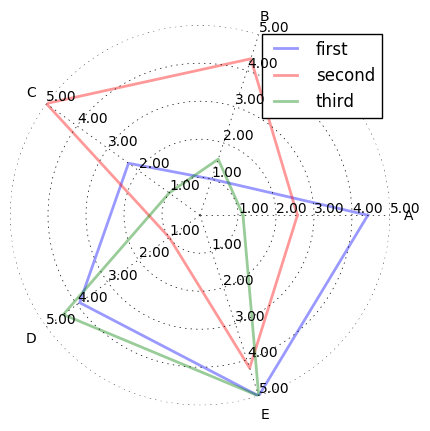

In [8]:
def scale(values):
    scaled_values = preprocessing.minmax_scale(values, feature_range=(1,len(values)))
    return (scaled_values).tolist()

a_scale = scale(a)
b_scale = scale(b)
c_scale = scale(c)

print a_scale
print b_scale
print c_scale
print 

fig = plt.figure(figsize=(4, 4))

titles = ['A', 'B', 'C', 'D','E']

labels = make_labels(a_scale+b_scale+c_scale, 5)


radar = Radar(fig, titles, labels)
radar.plot(a_scale,  "-", lw=2, color="b", alpha=0.4, label="first")
radar.plot(b_scale,"-", lw=2, color="r", alpha=0.4, label="second")
radar.plot(c_scale, "-", lw=2, color="g", alpha=0.4, label="third")
radar.ax.legend()
plt.show()